<a href="https://colab.research.google.com/github/julissamijares/SI-boston-city-budget/blob/main/SI-analysis/Department_Expense_Category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#install required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *

In [ ]:
#load the data
df = pd.read_csv("/content/drive/My Drive/WORK/SI_Budget_Report/Datasets/clean_OpBudget.csv")

df.head()

,Cabinet,Department,Program,Expense Category,FY21,FY22,FY23,FY24
0,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1820538.46,1624903.69,1584054.209,1921403.81
1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,127557.82,284597.90,99314.000,219633.42
2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,27318.17,28541.55,44938.000,55573.65
3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,11365.77,19410.30,29630.000,16734.29
4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,39040.60,16164.36,24900.000,36115.00


Question: Spending by department

In [ ]:
# Calculate the sum of each year
sum_per_year = df[['FY21', 'FY22', 'FY23', 'FY24']].sum()

# Calculate the average annual increase
average_increase_21_22 = (sum_per_year['FY22'] - sum_per_year['FY21']) / sum_per_year['FY21']
average_increase_22_23 = (sum_per_year['FY23'] - sum_per_year['FY22']) / sum_per_year['FY22']
average_increase_23_24 = (sum_per_year['FY24'] - sum_per_year['FY23']) / sum_per_year['FY23']

print("\nAverage Annual Increase:")
print(f"FY21 to FY22: {average_increase_21_22:.2%}")
print(f"FY22 to FY23: {average_increase_22_23:.2%}")
print(f"FY23 to FY24: {average_increase_23_24:.2%}")



Average Annual Increase:
FY21 to FY22: 6.56%
FY22 to FY23: 3.56%
FY23 to FY24: 6.65%


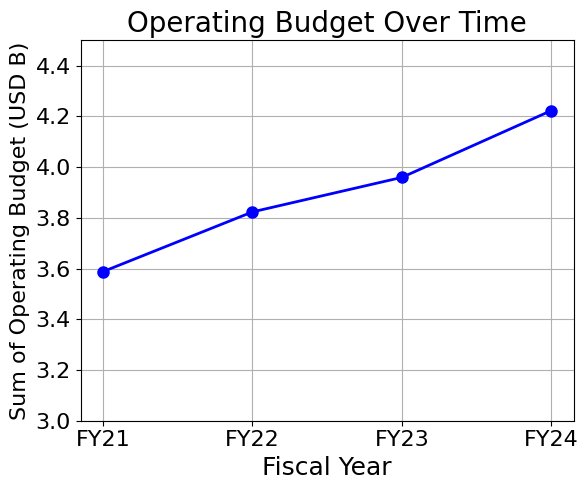

In [ ]:
# Calculate the sum of each year
sum_per_year = df[['FY21', 'FY22', 'FY23', 'FY24']].sum() / 1e9  # Divide by 1 billion to scale to B

# Plotting
plt.figure(figsize=(6, 5))  # Increase figure size
plt.plot(sum_per_year.index, sum_per_year.values, marker='o', linestyle='-', color='b', markersize=8, linewidth=2)  # Increase marker size and line width
plt.title('Operating Budget Over Time', fontsize=20)  # Increase title font size
plt.xlabel('Fiscal Year', fontsize=18)  # Increase x-axis label font size
plt.ylabel('Sum of Operating Budget (USD B)', fontsize=16)  # Increase y-axis label font size
plt.ylim(3, 4.5)  # Set y-axis range from 3B to 4.5B
plt.grid(True)
plt.tick_params(axis='both', labelsize=16)  # Increase tick label font size

# Adjust column width
plt.tight_layout()  # Alternatively, you can use plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1) to manually set margins

plt.show()

In [ ]:
# Calculate the percentage increase for each department from FY21 to FY24
department_growth = df.groupby('Department')[['FY21', 'FY22', 'FY23', 'FY24']].sum().pct_change(axis=1).mean(axis=1)

# Sort departments based on the average percentage increase in descending order
sorted_departments = department_growth.sort_values(ascending=False)

# Get the top 5 departments
top_5_departments = sorted_departments.head(5)

# Print the result
print("Top 5 Departments based on Average Percentage Increase:")
print(top_5_departments)


Top 5 Departments based on Average Percentage Increase:
Department
Office of Police Accountability & Transparency          inf
Workers' Compensation Fund                        64.357280
Execution of Courts                                1.368084
Annual Audit Costs                                 1.338896
Reserve for Collective Bargaining City             1.172103
dtype: float64


In [ ]:
# Filter the DataFrame for the "Workers' Compensation Fund" department
# Calculate the percentage increase for each department from FY21 to FY24
department_growth2 = df.groupby('Department')[['FY21', 'FY22']].sum().pct_change(axis=1).mean(axis=1)

# Sort departments based on the average percentage increase in descending order
sorted_departments2 = department_growth2.sort_values(ascending=False)

# Filter the statistics for the "Workers Compensation Department"
workers_comp_stats = department_growth2.loc[["Workers' Compensation Fund"]]

# Display the statistics
print("Percentage Increase for Workers Compensation Department:")
print(workers_comp_stats)

Percentage Increase for Workers Compensation Department:
Department
Workers' Compensation Fund    192.72493
dtype: float64


Bottom 5 Departments based on Average Percentage Increase:
Department
Office of Finance             -0.201210
Suffolk County Sheriff Dept   -0.083221
Library Department            -0.048916
Police Department             -0.013767
Central Fleet Management      -0.002525
dtype: float64


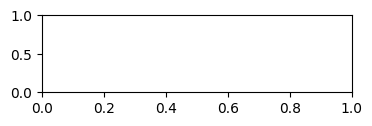

In [ ]:
# Calculate the percentage increase for each department from FY21 to FY24
department_growth = df.groupby('Department')[['FY21', 'FY22', 'FY23', 'FY24']].sum().pct_change(axis=1).mean(axis=1)

# Sort departments based on the average percentage increase in descending order
sorted_departments = department_growth.sort_values(ascending=True)

# Get the bottom 5 departments
bottom_5_departments = sorted_departments.head(5)

# Print the result
print("Bottom 5 Departments based on Average Percentage Increase:")
print(bottom_5_departments)

In [ ]:
# Count the number of departments with a decrease and increase in funding
num_decrease = (department_growth < 0).sum()
num_increase = (department_growth > 0).sum()

# Print the result
print(f"Number of departments with a decrease in funding: {num_decrease}")
print(f"Number of departments with an increase in funding: {num_increase}")

Number of departments with a decrease in funding: 5
Number of departments with an increase in funding: 61


Top 5 Departments based on Average Percentage of Total Budget:
Department
Boston Public Schools     34.451662
Police Department         10.591611
Pensions                   8.697635
Fire Department            7.161402
Charter School Tuition     6.349668
dtype: float64


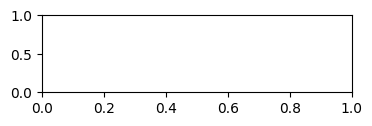

In [ ]:
# Calculate the total budget for each fiscal year
total_budget_per_year = df[['FY21', 'FY22', 'FY23', 'FY24']].sum()

# Calculate the proportion for each department and fiscal year
proportion_per_department = df.groupby('Department')[['FY21', 'FY22', 'FY23', 'FY24']].sum().div(total_budget_per_year, axis=1) * 100

# Calculate the average percentage across all fiscal years for each department
average_percentage_per_department = proportion_per_department.mean(axis=1)

# Sort departments based on the average percentage in descending order
sorted_departments = average_percentage_per_department.sort_values(ascending=False)

# Get the top 3 departments
top_5_departments = sorted_departments.head(5)

# Print the result
print("Top 5 Departments based on Average Percentage of Total Budget:")
print(top_5_departments)

Question: Spending by budget (expense) category

In [ ]:
# Calculate the percentage increase for each department from FY21 to FY24
category_growth = df.groupby('Expense Category')[['FY21', 'FY22', 'FY23', 'FY24']].sum().pct_change(axis=1).mean(axis=1)

# Sort departments based on the average percentage increase in descending order
sorted_category = category_growth.sort_values(ascending=False)

print(sorted_category)

Expense Category
Fixed Expenses                   0.130486
Other Expenses                   0.079912
Equipment                        0.065760
Contractual Services             0.062510
Current Charges & Obligations    0.050558
Personnel Services               0.039229
Supplies & Materials             0.019635
dtype: float64


In [ ]:
# Calculate the sum for each Expense Category for each FY
category_sum = df.groupby('Expense Category')[['FY21', 'FY22', 'FY23', 'FY24']].sum()

# Find the average sum for the four total FY
average_sum = category_sum.mean(axis=1)

# Calculate the percentage of the average sum each Expense Category takes up
percentage_of_total = (average_sum / average_sum.sum()) * 100

# Create a new DataFrame for the results
result_df = pd.DataFrame({
    'Expense Category': category_sum.index,
    'Total Sum FY21-FY24': average_sum,
    'Percentage of Total': percentage_of_total
})

# Sort the DataFrame by 'Total Sum FY21-FY24' in descending order
result_df = result_df.sort_values(by='Total Sum FY21-FY24', ascending=False)

# Reset the index for better presentation
result_df = result_df.reset_index(drop=True)

# Print the result
print(result_df)

                Expense Category  Total Sum FY21-FY24  Percentage of Total
0             Personnel Services         1.992844e+09            51.117528
1                 Other Expenses         9.018254e+08            23.132314
2           Contractual Services         4.574061e+08            11.732715
3  Current Charges & Obligations         2.665938e+08             6.838277
4                 Fixed Expenses         2.054053e+08             5.268759
5           Supplies & Materials         4.091510e+07             1.049495
6                      Equipment         3.356309e+07             0.860912
